In [1]:
# The radtran module is licensed only for non-commercial use. 
# Contact Dr. Daniel Varon if you want to reproduce the retrieval part
# The methane retrievals and predicted plume masks are archived and deposited
from plot_functions import *

HAPI version: 1.1.1.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


C:\Users\tailo\anaconda3\envs\ch4_labeller\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tailo\anaconda3\envs\ch4_labeller\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
import warnings
warnings.filterwarnings('ignore')

check2
1986-04-28 00:00:00 1985-10-30 06:01:07.852000 1986-10-25 06:01:07.852000
check2
(128, 128) (128, 128) (128, 128) (128, 128) (128, 128)
(1, 6, 128, 128)
Creating the transmission spectrum...
--- 37.94142985343933 seconds --- to run radtran()
Creating the transmission spectrum...
--- 47.53059935569763 seconds --- to run radtran()
--- 22.610007762908936 seconds --- to optimize
Creating the transmission spectrum...
--- 37.534666538238525 seconds --- to run radtran()
Creating the transmission spectrum...
--- 47.96647810935974 seconds --- to run radtran()
--- 22.616251707077026 seconds --- to optimize
check2
1998-02-20 00:00:00 1997-08-24 06:37:21.771000 1998-08-19 06:37:21.771000
check2
(128, 128) (128, 128) (128, 128) (128, 128) (128, 128)
(1, 6, 128, 128)
Creating the transmission spectrum...
--- 37.56108784675598 seconds --- to run radtran()
Creating the transmission spectrum...
--- 48.27842879295349 seconds --- to run radtran()
--- 64.04892182350159 seconds --- to optimize
Creat

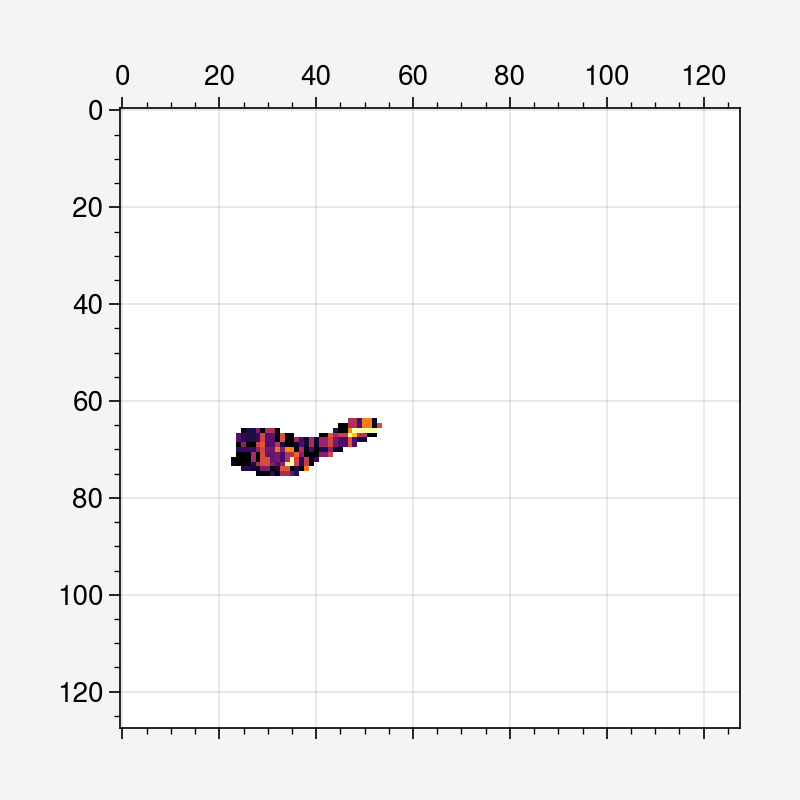

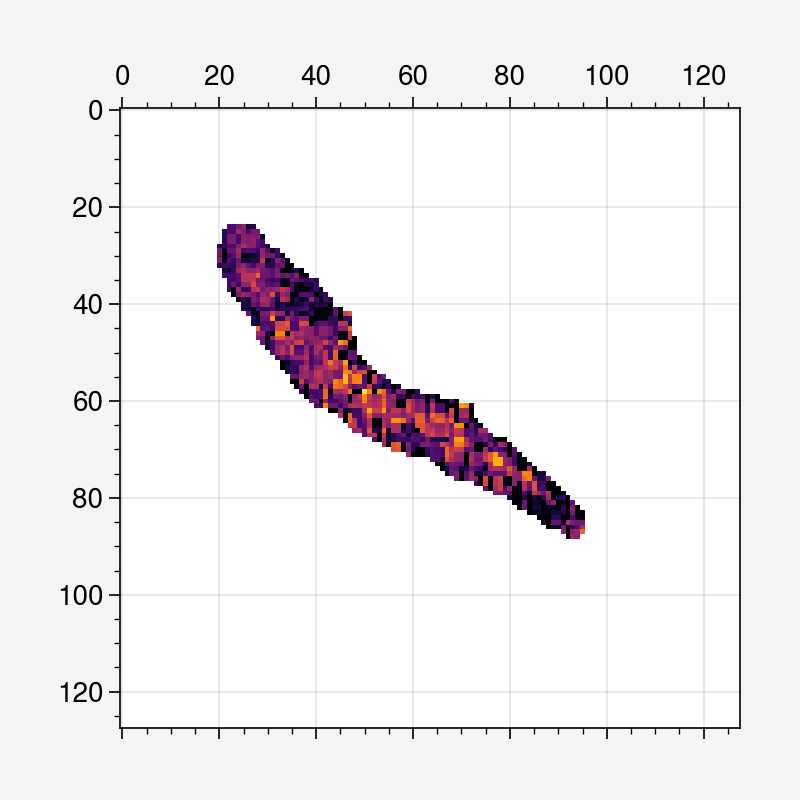

In [3]:
lons1, lats1, dr1, bg1, enhance1, rgb1, _0p1lvl1, _0p5lvl1, QQQ1, dQQQ1, ime1, u10m1, v10m1 = get_plume_info(61.290, 40.8, 1986, 4, 28, _satellite='Landsat 5', _timewindow=180)
lons3, lats3, dr3, bg3, enhance3, rgb3, _0p1lvl3, _0p5lvl3, QQQ3, dQQQ3, ime3, u10m3, v10m3 = get_plume_info(53.828, 39.396, 1998, 2, 20, _satellite='Landsat 5', _timewindow=180)

In [4]:
import matplotlib.patches as patches

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d)*60
    m = int(md)
    sd = (md - m)*60
    sd = int(sd)
    return "%d°%d\'%d\""%(d, m, sd)

5.197564333879603
1.4655276602386227


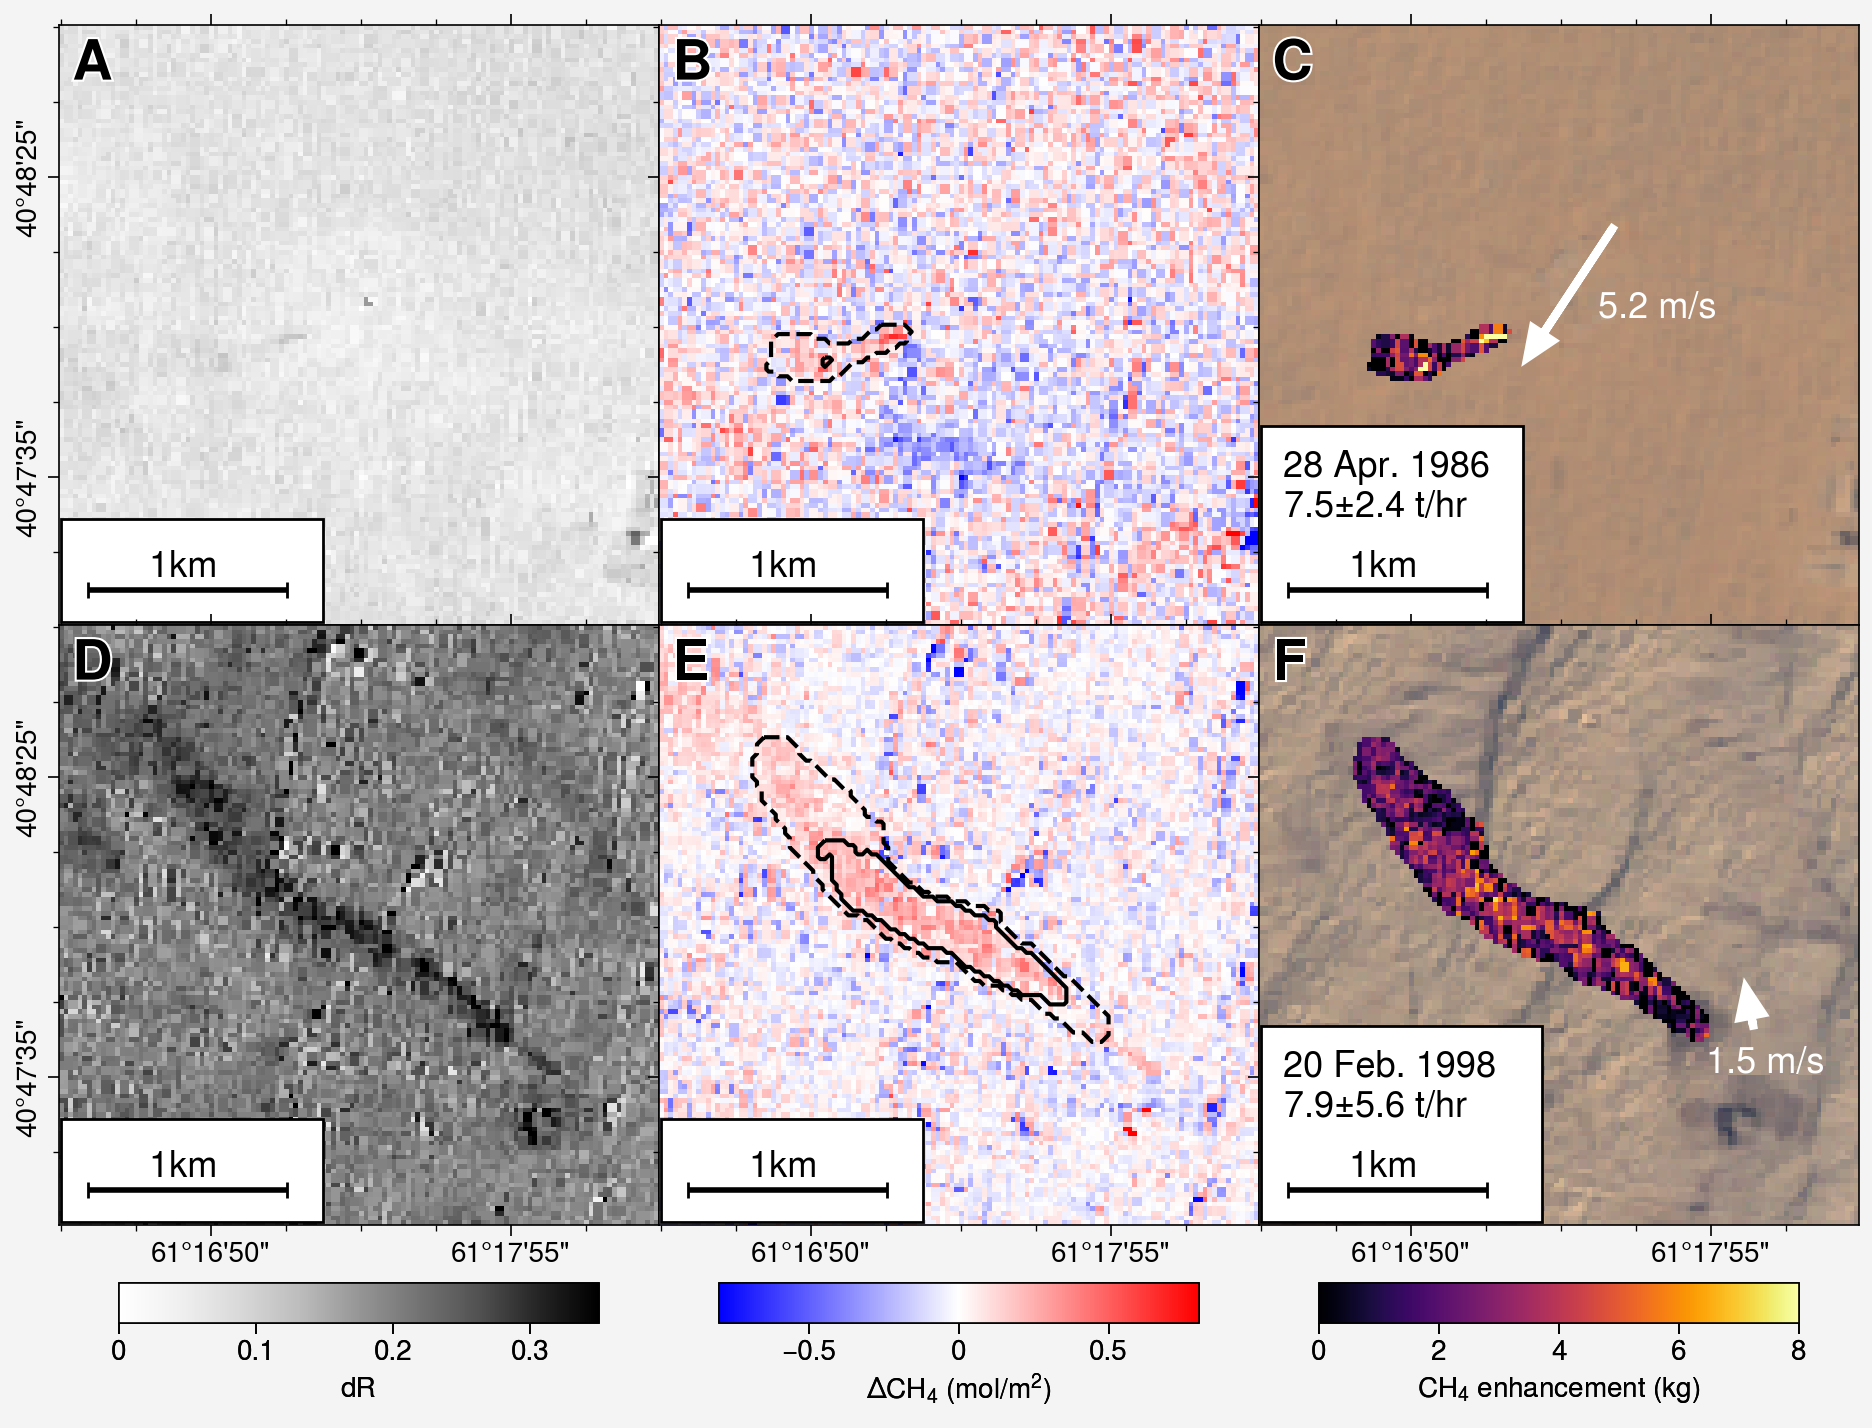

In [5]:
pplt.rc.fontsize=10
fig = pplt.figure(refwidth=3, sharex=False, sharey=False)
gs = pplt.GridSpec(4, 6, wspace=0, hspace=0)

fracmin, fracmax = 0.00, 0.35
# enhancemin, enhancemax

ax1 = fig.add_subplot(gs[:2, :2])
im1 = ax1.matshow(dr1, cmap='Greys', vmin=fracmin, vmax=fracmax)


ax2 = fig.add_subplot(gs[:2, 2:4])
im = ax2.matshow(enhance1, cmap='bwr', vmin=-0.8, vmax=0.8)
ax2.contour(_0p1lvl1, levels=[0.5], colors='black', linestyles='dashed')
ax2.contour(_0p5lvl1, levels=[0.5], colors='black', linestyles='solid')
ax2.format(yformatter='null', xformatter='null', yticks=[32, 96], xticks=[32, 96])

ax3 = fig.add_subplot(gs[:2, 4:])
im_temp = ax3.matshow(ime1, cmap='inferno', vmin=0, vmax=8)
im = ax3.imshow(rgb1)
ax3.format(yformatter='null', xformatter='null', yticks=[32, 96], xticks=[32, 96])
# ax.text(0.8, 0.9, r'Q=%.2f$\pm$%.2f kg/hr'%(QQQ5, dQQQ5), transform=axs[2, 3].transAxes, fontsize=20)

ax1.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
tick1, tick2 = lats1[31, 0], lats1[95, 0] 
tick3, tick4 = lons1[0, 31], lons1[0, 95] 
ax1.set_yticklabels([dd2dms(tick1), dd2dms(tick2)], rotation='vertical', va='center')

ax4 = fig.add_subplot(gs[2:4, :2])
im4 = ax4.matshow(dr3, cmap='Greys', vmin=fracmin, vmax=fracmax)

ax5 = fig.add_subplot(gs[2:4, 2:4])
im5 = ax5.matshow(enhance3, cmap='bwr', vmin=-0.8, vmax=0.8)
ax5.contour(_0p1lvl3, levels=[0.5], colors='black', linestyles='dashed')
ax5.contour(_0p5lvl3, levels=[0.5], colors='black', linestyles='solid')
ax5.format(yformatter='null', yticks=[32, 96], xticks=[32, 96])

ax6 = fig.add_subplot(gs[2:4, 4:])
im_temp = ax6.matshow(ime3, cmap='inferno', vmin=0, vmax=8)
im = ax6.imshow(rgb3)
ax6.format(yformatter='null', yticks=[32, 96], xticks=[32, 96])

ax4.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
ax4.set_yticklabels([dd2dms(tick1), dd2dms(tick2)], rotation='vertical', va='center')
ax4.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
ax4.set_xticklabels([dd2dms(tick3), dd2dms(tick4)])
ax4.colorbar(im4, loc='bottom', label='dR', length=0.8)

ax5.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
ax5.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
ax5.set_xticklabels([dd2dms(tick3), dd2dms(tick4)])
cb = ax5.colorbar(im5, loc='bottom', label=r'$\Delta$CH$_4$ (mol/m$^2$)', length=0.8)
cb.set_label(r'$\Delta$CH$_4$ (mol/m$^2$)', labelpad=+2)

ax6.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
ax6.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
ax6.set_xticklabels([dd2dms(tick3), dd2dms(tick4)])
cb = ax6.colorbar(im_temp, loc='bottom', label=r'CH$_4$ enhancement (kg)', length=0.8)
cb.set_label(r'CH$_4$ enhancement (kg)', labelpad=+3)


ax3.text(0.040, 0.18, '28 Apr. 1986\n%.1f$\pm$%.1f t/hr'%(round(QQQ1/1e3, 1), round(dQQQ1/1e3, 1)), transform=ax3.transAxes, fontsize=13, color='k', zorder=20)
ax6.text(0.040, 0.18, '20 Feb. 1998\n%.1f$\pm$%.1f t/hr'%(round(QQQ3/1e3, 1), round(dQQQ3/1e3, 1)), transform=ax6.transAxes, fontsize=13, color='k', zorder=20)

ax1.text(0.05, 0.08, '      1km      ', transform=ax1.transAxes, fontsize=13, color='k', zorder=20)
ax2.text(0.05, 0.08, '      1km      ', transform=ax2.transAxes, fontsize=13, color='k', zorder=20)
ax3.text(0.05, 0.08, '      1km      ', transform=ax3.transAxes, fontsize=13, color='k', zorder=20)
ax4.text(0.05, 0.08, '      1km      ', transform=ax4.transAxes, fontsize=13, color='k', zorder=20)
ax5.text(0.05, 0.08, '      1km      ', transform=ax5.transAxes, fontsize=13, color='k', zorder=20)
ax6.text(0.05, 0.08, '      1km      ', transform=ax6.transAxes, fontsize=13, color='k', zorder=20)

ax1.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax2.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax4.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax6.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax3.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax5.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)


arrow_length = 1
wspeed = np.sqrt(u10m1[0]**2+ v10m1[0]**2)
print(wspeed)
vx, vy = arrow_length*wspeed*u10m1[0], arrow_length*wspeed*v10m1[0]
ax3.arrow(75, 43, vx, -vy, head_width=5, head_length=6, fc='w', ec='w', lw=3)
ax3.text(72, 62, '5.2 m/s', fontsize=13, color='w')

wspeed = np.sqrt(u10m3[0]**2+ v10m3[0]**2)
print(wspeed)
vx, vy = arrow_length*wspeed*u10m3[0], arrow_length*wspeed*v10m3[0]
ax6.arrow(105, 85, vx, -vy, head_width=5, head_length=6, fc='w', ec='w', lw=3)
ax6.text(95, 95, '1.5 m/s', fontsize=13, color='w')

rect = patches.Rectangle((0, 85), 56, 42, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax3.add_patch(rect)
rect = patches.Rectangle((0, 85), 60, 42, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax6.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax1.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax2.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax4.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax5.add_patch(rect)

# ax1.colorbar(im1, loc='l', label='dR', length=0.8, ticks=[0, 0.05, 0.1, 0.15, 0.2])
# ax4.colorbar(im4, loc='l', label='dR', length=0.8)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)
ax5.grid(False)
ax6.grid(False)

fig.format(abc='A', abcloc='ul', abcsize=20)
# fig.savefig('fig1top_Aug9.eps')

5.197564333879603
1.4655276602386227


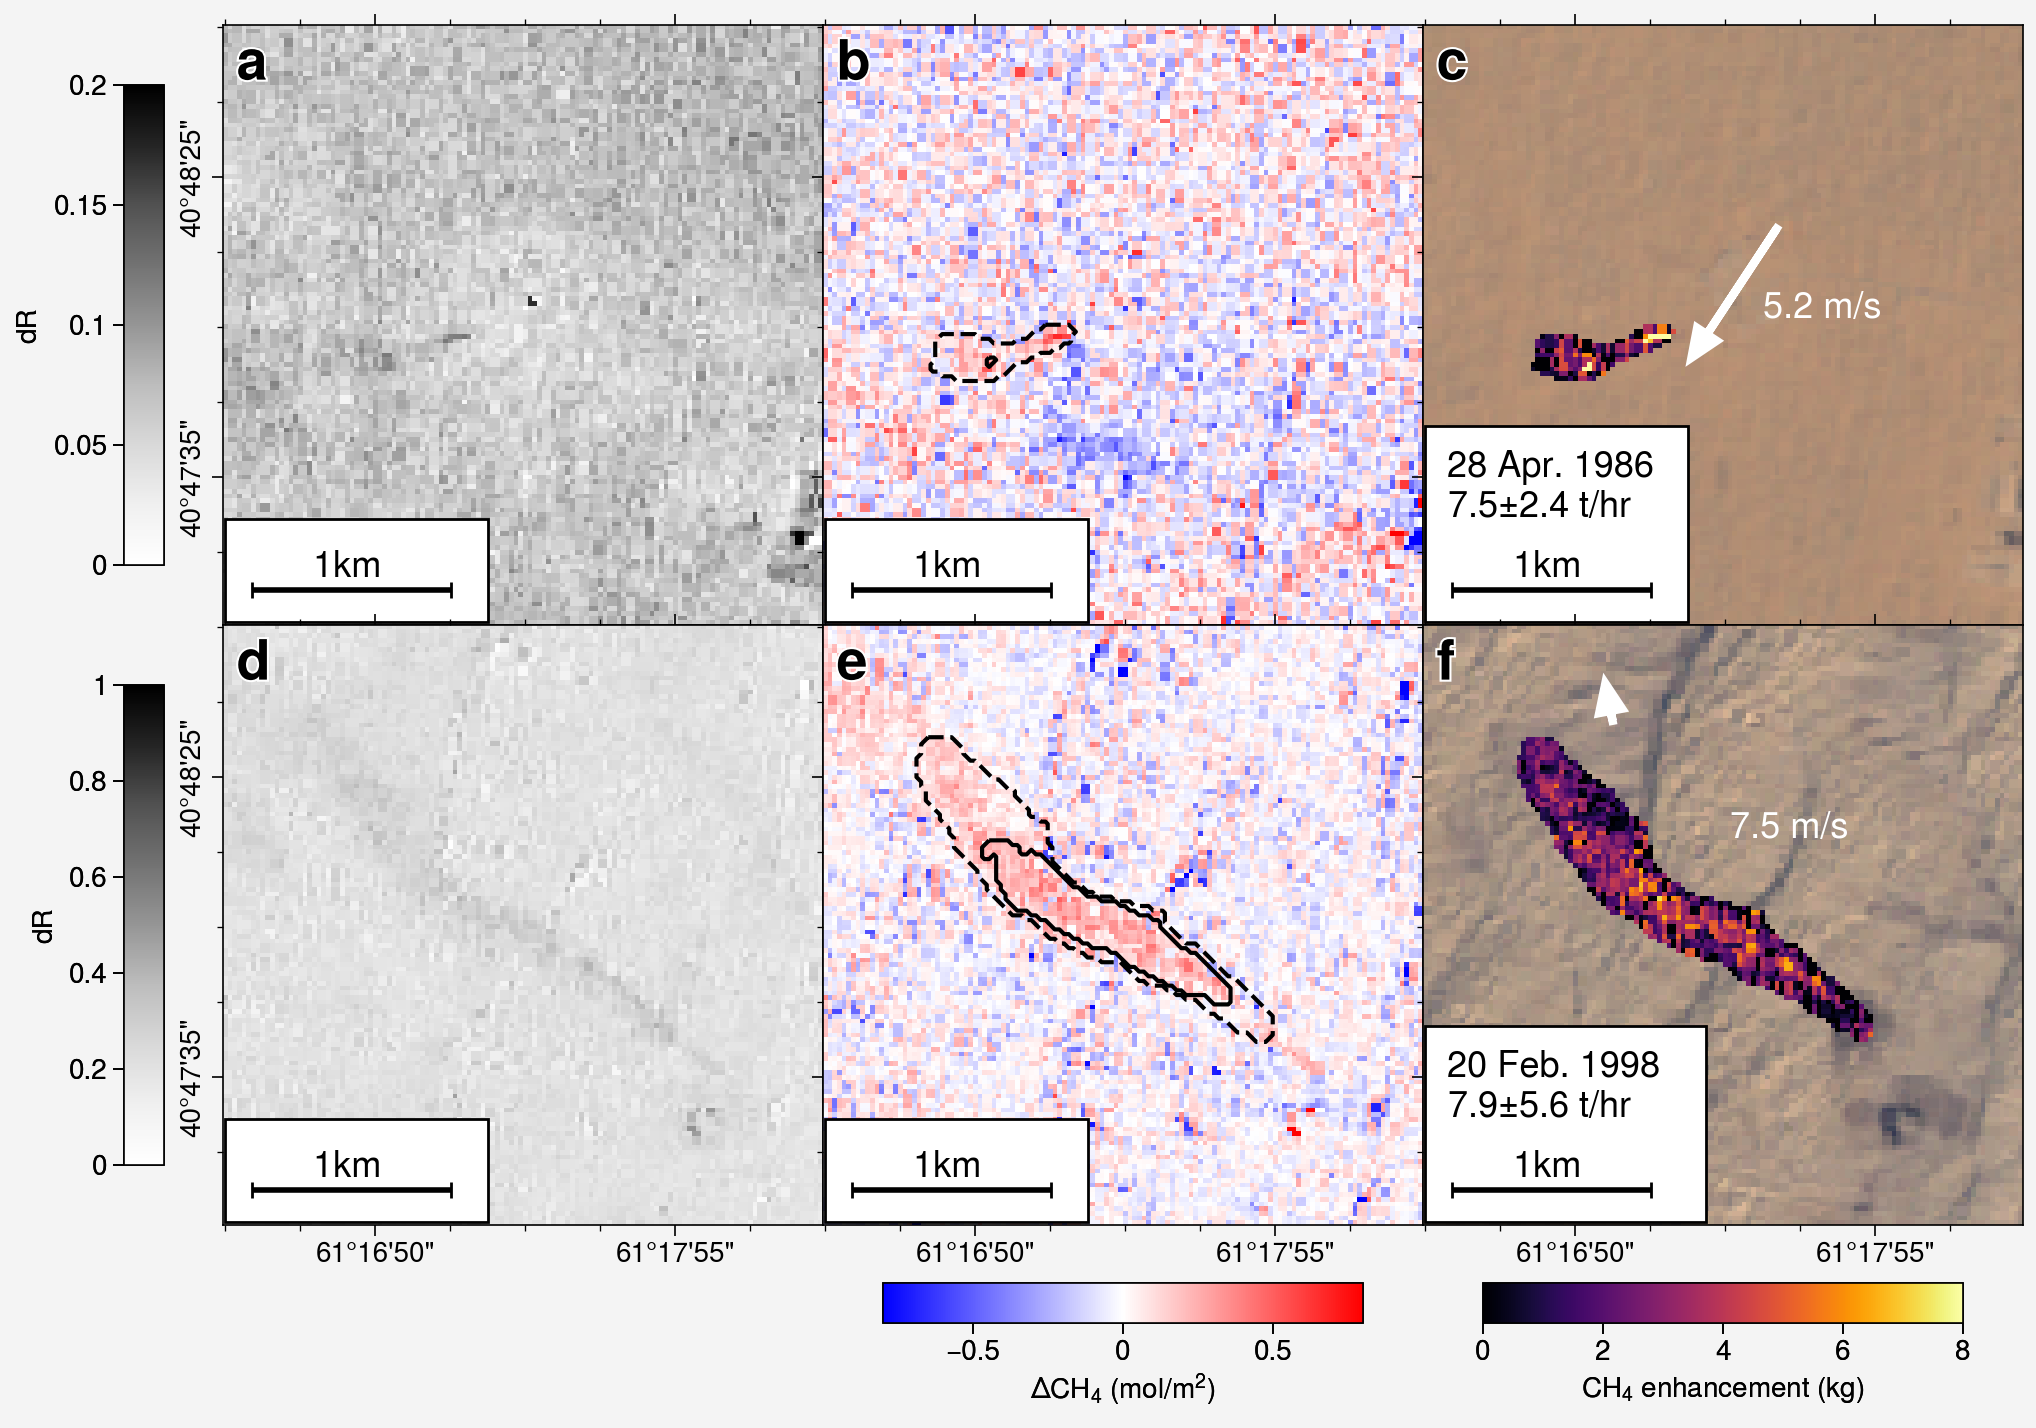

In [82]:
pplt.rc.fontsize=10
fig = pplt.figure(refwidth=3, sharex=False, sharey=False)
gs = pplt.GridSpec(4, 6, wspace=0, hspace=0)

fracmin, fracmax = 0.00, 0.35
# enhancemin, enhancemax

ax1 = fig.add_subplot(gs[:2, :2])
im1 = ax1.matshow(dr1, cmap='Greys', vmin=fracmin, vmax=0.2)


ax2 = fig.add_subplot(gs[:2, 2:4])
im = ax2.matshow(enhance1, cmap='bwr', vmin=-0.8, vmax=0.8)
ax2.contour(_0p1lvl1, levels=[0.5], colors='black', linestyles='dashed')
ax2.contour(_0p5lvl1, levels=[0.5], colors='black', linestyles='solid')
ax2.format(yformatter='null', xformatter='null', yticks=[32, 96], xticks=[32, 96])

ax3 = fig.add_subplot(gs[:2, 4:])
im_temp = ax3.matshow(ime1, cmap='inferno', vmin=0, vmax=8)
im = ax3.imshow(rgb1)
ax3.format(yformatter='null', xformatter='null', yticks=[32, 96], xticks=[32, 96])
# ax.text(0.8, 0.9, r'Q=%.2f$\pm$%.2f kg/hr'%(QQQ5, dQQQ5), transform=axs[2, 3].transAxes, fontsize=20)

ax1.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
tick1, tick2 = lats1[31, 0], lats1[95, 0] 
tick3, tick4 = lons1[0, 31], lons1[0, 95] 
ax1.set_yticklabels([dd2dms(tick1), dd2dms(tick2)], rotation='vertical', va='center')

ax4 = fig.add_subplot(gs[2:4, :2])
im4 = ax4.matshow(dr3, cmap='Greys', vmin=fracmin, vmax=1)

ax5 = fig.add_subplot(gs[2:4, 2:4])
im5 = ax5.matshow(enhance3, cmap='bwr', vmin=-0.8, vmax=0.8)
ax5.contour(_0p1lvl3, levels=[0.5], colors='black', linestyles='dashed')
ax5.contour(_0p5lvl3, levels=[0.5], colors='black', linestyles='solid')
ax5.format(yformatter='null', yticks=[32, 96], xticks=[32, 96])

ax6 = fig.add_subplot(gs[2:4, 4:])
im_temp = ax6.matshow(ime3, cmap='inferno', vmin=0, vmax=8)
im = ax6.imshow(rgb3)
ax6.format(yformatter='null', yticks=[32, 96], xticks=[32, 96])

ax4.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
ax4.set_yticklabels([dd2dms(tick1), dd2dms(tick2)], rotation='vertical', va='center')
ax4.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
ax4.set_xticklabels([dd2dms(tick3), dd2dms(tick4)])
# ax4.colorbar(im4, loc='bottom', label='dR', length=0.8)

ax5.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
ax5.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
ax5.set_xticklabels([dd2dms(tick3), dd2dms(tick4)])
cb = ax5.colorbar(im5, loc='bottom', label=r'$\Delta$CH$_4$ (mol/m$^2$)', length=0.8)
cb.set_label(r'$\Delta$CH$_4$ (mol/m$^2$)', labelpad=+2)

ax6.format(xformatter='null', yticks=[32, 96], xticks=[32, 96])
ax6.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
ax6.set_xticklabels([dd2dms(tick3), dd2dms(tick4)])
cb = ax6.colorbar(im_temp, loc='bottom', label=r'CH$_4$ enhancement (kg)', length=0.8)
cb.set_label(r'CH$_4$ enhancement (kg)', labelpad=+3)


ax3.text(0.040, 0.18, '28 Apr. 1986\n%.1f$\pm$%.1f t/hr'%(round(QQQ1/1e3, 1), round(dQQQ1/1e3, 1)), transform=ax3.transAxes, fontsize=13, color='k', zorder=20)
ax6.text(0.040, 0.18, '20 Feb. 1998\n%.1f$\pm$%.1f t/hr'%(round(QQQ3/1e3, 1), round(dQQQ3/1e3, 1)), transform=ax6.transAxes, fontsize=13, color='k', zorder=20)

ax1.text(0.05, 0.08, '      1km      ', transform=ax1.transAxes, fontsize=13, color='k', zorder=20)
ax2.text(0.05, 0.08, '      1km      ', transform=ax2.transAxes, fontsize=13, color='k', zorder=20)
ax3.text(0.05, 0.08, '      1km      ', transform=ax3.transAxes, fontsize=13, color='k', zorder=20)
ax4.text(0.05, 0.08, '      1km      ', transform=ax4.transAxes, fontsize=13, color='k', zorder=20)
ax5.text(0.05, 0.08, '      1km      ', transform=ax5.transAxes, fontsize=13, color='k', zorder=20)
ax6.text(0.05, 0.08, '      1km      ', transform=ax6.transAxes, fontsize=13, color='k', zorder=20)

ax1.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax2.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax4.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax6.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax3.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)
ax5.errorbar(27, 120, xerr=21.3, color='k', lw=2, capsize=3, zorder=20)


arrow_length = 1
wspeed = np.sqrt(u10m1[0]**2+ v10m1[0]**2)
print(wspeed)
vx, vy = arrow_length*wspeed*u10m1[0], arrow_length*wspeed*v10m1[0]
ax3.arrow(75, 43, vx, -vy, head_width=5, head_length=6, fc='w', ec='w', lw=3)
ax3.text(72, 62, '5.2 m/s', fontsize=13, color='w')

wspeed = np.sqrt(u10m3[0]**2+ v10m3[0]**2)
print(wspeed)
vx, vy = arrow_length*wspeed*u10m3[0], arrow_length*wspeed*v10m3[0]
ax6.arrow(40, 20, vx, -vy, head_width=5, head_length=6, fc='w', ec='w', lw=3)
ax6.text(65, 45, '7.5 m/s', fontsize=13, color='w')

rect = patches.Rectangle((0, 85), 56, 42, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax3.add_patch(rect)
rect = patches.Rectangle((0, 85), 60, 42, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax6.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax1.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax2.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax4.add_patch(rect)
rect = patches.Rectangle((0, 105), 56, 22, linewidth=1, edgecolor='black', facecolor='white', zorder=15)
ax5.add_patch(rect)

ax1.colorbar(im1, loc='l', label='dR', length=0.8, ticks=[0, 0.05, 0.1, 0.15, 0.2])
ax4.colorbar(im4, loc='l', label='dR', length=0.8)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)
ax5.grid(False)
ax6.grid(False)

fig.format(abc=True, abcloc='ul', abcsize=20)
# fig.savefig('fig1top.pdf')

In [7]:
import cartopy.io.shapereader as shapereader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.img_tiles as cimgt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib

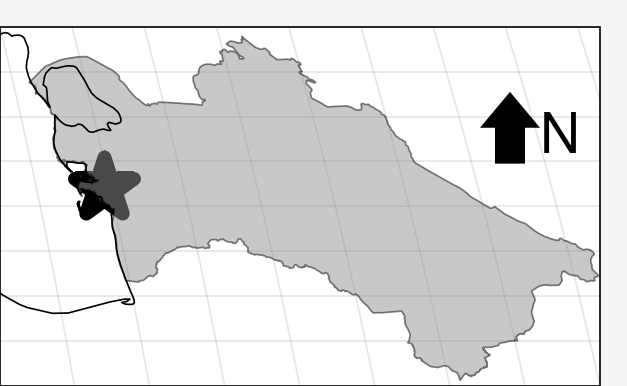

In [9]:
fig = pplt.figure(refwidth=3, left=0, right=1, bottom=0, top=1)

ax = fig.add_subplot(1, 1, 1, proj='robin')
country_shape = list(shapereader.Reader('gadm41_TKM_shp/gadm41_TKM_0.shp').geometries())

arrow = mpatches.FancyArrow(0.85, 0.62, 0, 0.1, width=0.05, head_length=0.1, head_width=0.1, transform=ax.transAxes, edgecolor='none', facecolor='k')
ax.add_patch(arrow)
# ax.text(0.66, 0.88, '1998/2/20', transform=ax.transAxes, fontsize=15)
ax.text(0.9, 0.65, 'N', transform=ax.transAxes, fontsize=20)
ax.format(
    abc=False, reso='med', coast=True, lonlim=(52,66), latlim=(35,43), land=False, landcolor='none') # 

ax.add_geometries(country_shape, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)
im = ax.scatter(53.828, 39.396, facecolor='black', edgecolor='black', linewidth=5, s=500, marker='*')
plt.subplots_adjust(top=1.2, right=1.2)
plt.tight_layout()
plt.grid(False)
# fig.savefig('fig_map2.png', dpi=300)

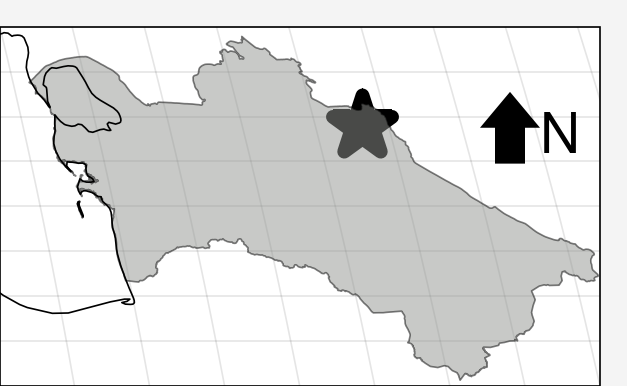

In [10]:
fig = pplt.figure(refwidth=3, sharex=False, sharey=False, left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(1, 1, 1, proj='robin')

country_shape = list(shapereader.Reader('gadm41_TKM_shp/gadm41_TKM_0.shp').geometries())

arrow = mpatches.FancyArrow(0.85, 0.62, 0, 0.1, width=0.05, head_length=0.1, head_width=0.1, transform=ax.transAxes, edgecolor='none', facecolor='k')
ax.add_patch(arrow)
# ax.text(0.66, 0.88, '1986/4/28', transform=ax.transAxes, fontsize=15)
ax.text(0.9, 0.65, 'N', transform=ax.transAxes, fontsize=20)
ax.format(
    abc=False, reso='med', coast=True, lonlim=(52,66), latlim=(35,43), land=False, landcolor='none') # 

ax.add_geometries(country_shape, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)
im = ax.scatter(61.290, 40.8, facecolor='black', edgecolor='black', linewidth=5, s=500, marker='*')

plt.grid(False)
# fig.savefig('fig_map1.eps')

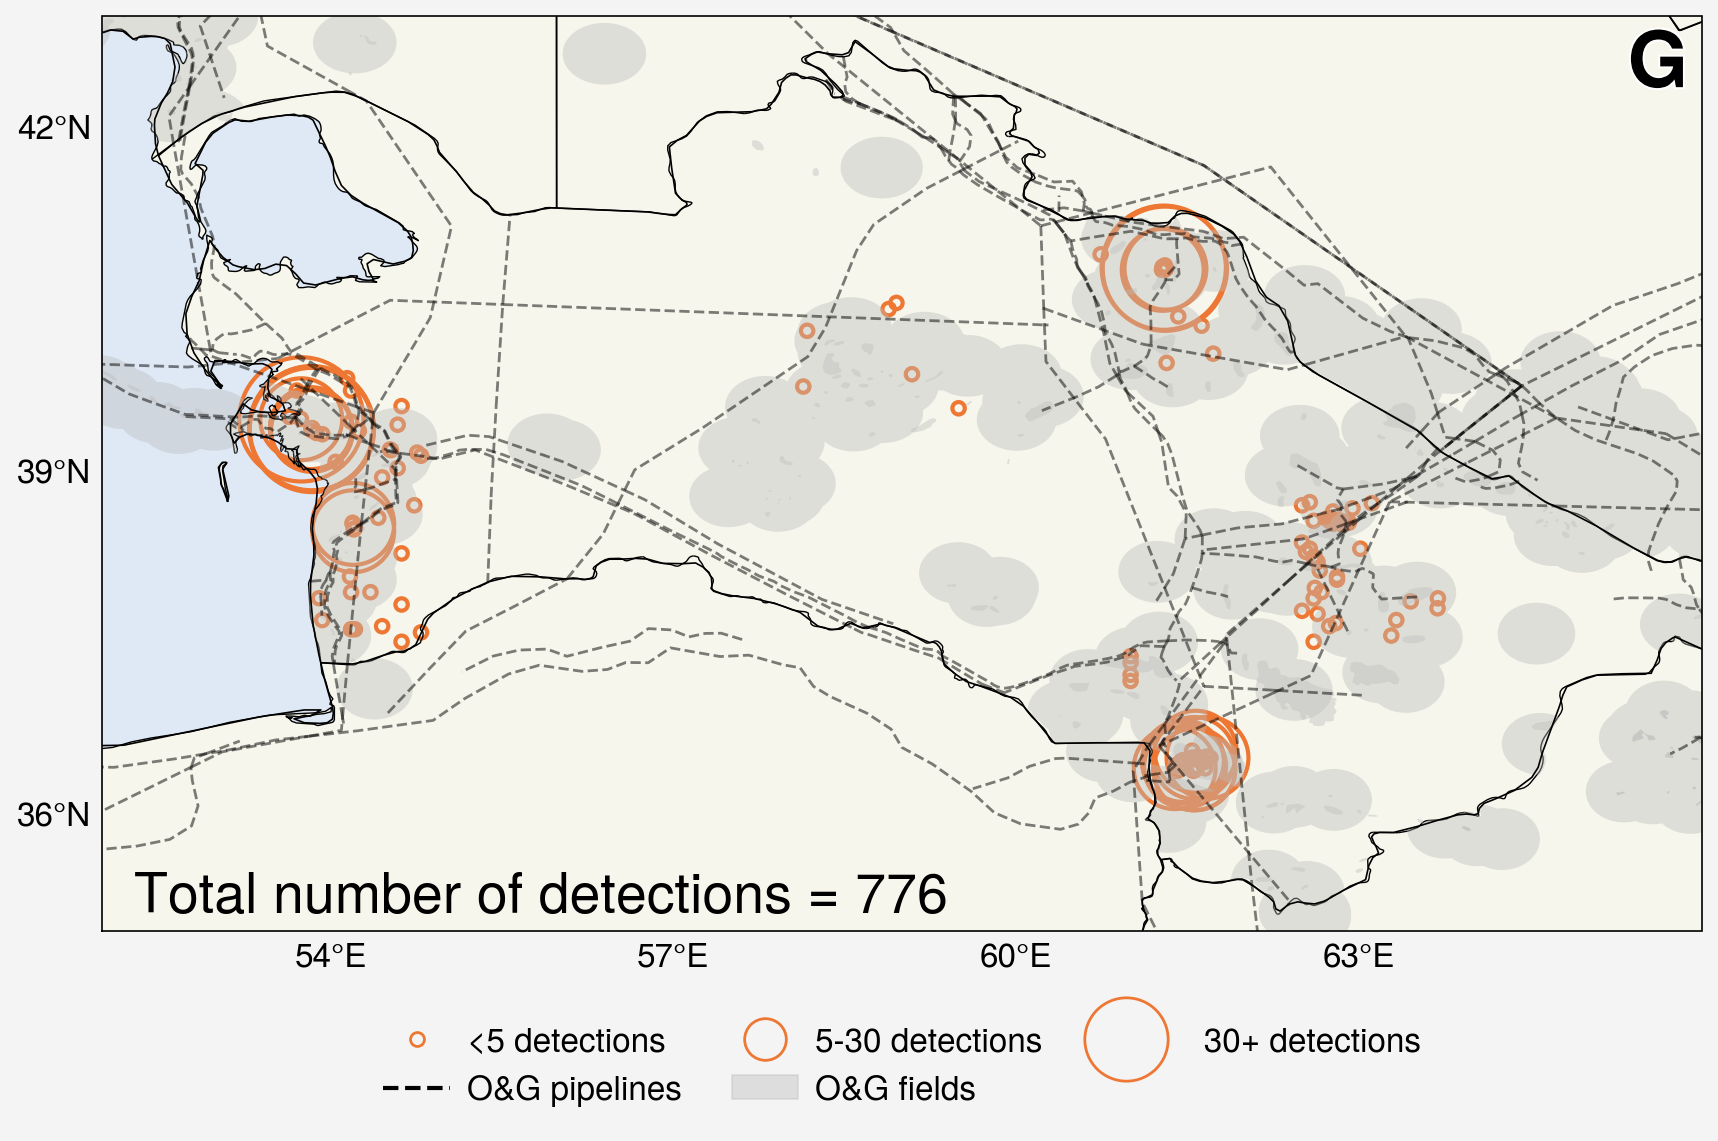

In [13]:
pplt.rc.fontsize=12

gs = pplt.GridSpec(ncols=1, nrows=1)
fig = pplt.figure(refwidth=8)

ax = fig.subplot(gs[0], proj='cyl')
ax.number = 7
ax.format(latlim=(34.7, 43.2), lonlim=(52.3, 67), labels=True)

ax.add_feature(cfeature.COASTLINE.with_scale('10m'), lw=0.5, color='k')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), lw=0.5, color='k')
ax.add_feature(cfeature.LAND.with_scale('10m'), alpha=0.5) 
ax.add_feature(cfeature.OCEAN.with_scale('10m'), alpha=0.3) 






df = pd.read_csv('L5_detections_Jan8_nosmoke.csv')
subdf = df['Longitude'].astype(str) + '_' + df['Latitude'].astype(str)
subdf = set(subdf)
loclist = np.array([[float(s.split('_')[0]), float(s.split('_')[1])] for s in subdf])

freq = []
for i in range(loclist.shape[0]): # loclist.shape[0]
    _subdf = df[ (df['Longitude'] == float(loclist[i, 0])) & (df['Latitude'] == float(loclist[i, 1])) ]
    _meanq = np.nanmean(_subdf['Q (kg/hr)'].astype('float'))
    _freq = _subdf.shape[0]
    freq.append(_freq)

freq = np.array(freq)
size = np.zeros(freq.shape)
size[:] = 100
size[np.where(freq > 5)] = 400
size[np.where(freq > 30)] = 800
sc = ax.scatter(loclist[:, 0], loclist[:, 1], markersize=size, linewidth=1.5, edgecolors='#EE7733', c='none', smin=20, smax=2000) # , c=meanq, cmap=cmap, norm='log', vmin=1000, vmax=20000, extend='both'


handles, labels = ax.get_legend_handles_labels()
from matplotlib.lines import Line2D

patch = Line2D([], [], marker='o', color='#EE7733', label='<5 detections',
                          markerfacecolor='none', markersize=5, linewidth=0)
handles.append(patch) 
patch = Line2D([], [], marker='o', color='#EE7733', label='5-30 detections',
                          markerfacecolor='none', markersize=15, linewidth=0)
handles.append(patch) 
patch = Line2D([], [], marker='o', color='#EE7733', label='   30+ detections',
                          markerfacecolor='none', markersize=30, linewidth=0)
handles.append(patch) 


fname = 'Global_Oil_and_Gas_Features_fields/Fields.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), edgecolor='#BBBBBB')
ax.add_feature(shape_feature, alpha=0.4, facecolor='#BBBBBB', edgecolor='none', linewidth=0, label='O&G fields')

fname = 'Global_Oil_and_Gas_Features_pipline/Pipelines.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), edgecolor='k')
ax.add_feature(shape_feature, alpha=0.5, facecolor='none', linewidth=1, linestyle='--', label='O&G pipelines')

line = Line2D([0], [0], label='O&G pipelines', color='k', ls='--')
handles.append(line) 
patch = mpatches.Patch(alpha=0.4, facecolor='#BBBBBB', edgecolor='#BBBBBB', label='O&G fields')
handles.append(patch)

ax.format(abc='A', abcloc='ur', abcsize=28, reso='med', coast=True, lonlim=(52,66), latlim=(35,43), innerborders=True, borders=True)
ax.legend(handles=handles, ncol=3, borderpad=0.5, loc='bottom', frameon=False, bbox_to_anchor=(0.5, 0.5), fontsize=23)
# legend1 = plt.legend([patch1, patch2, patch3],['1','2','3'], ncol=3, borderpad=0, loc='bottom', frameon=False)
# ax.add_artist(legend1)
# legend2 = plt.legend([patch1, patch2, patch3],['1','2','3'], ncol=3, borderpad=0, loc='bottom', frameon=False)
# ax.add_artist(legend2)
# ax.colorbar(im, loc='b', length=0.8, tickminor=True, label='Mean flux rate (kg/hr)')
ax.text(0.02, 0.02, 'Total number of detections = 776', fontsize=20, transform=ax.transAxes )

ax.format(longrid=False, latgrid=False, lonlines=3, latlines=3)
# plt.savefig('fig1g_Aug9.pdf')

In [14]:
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

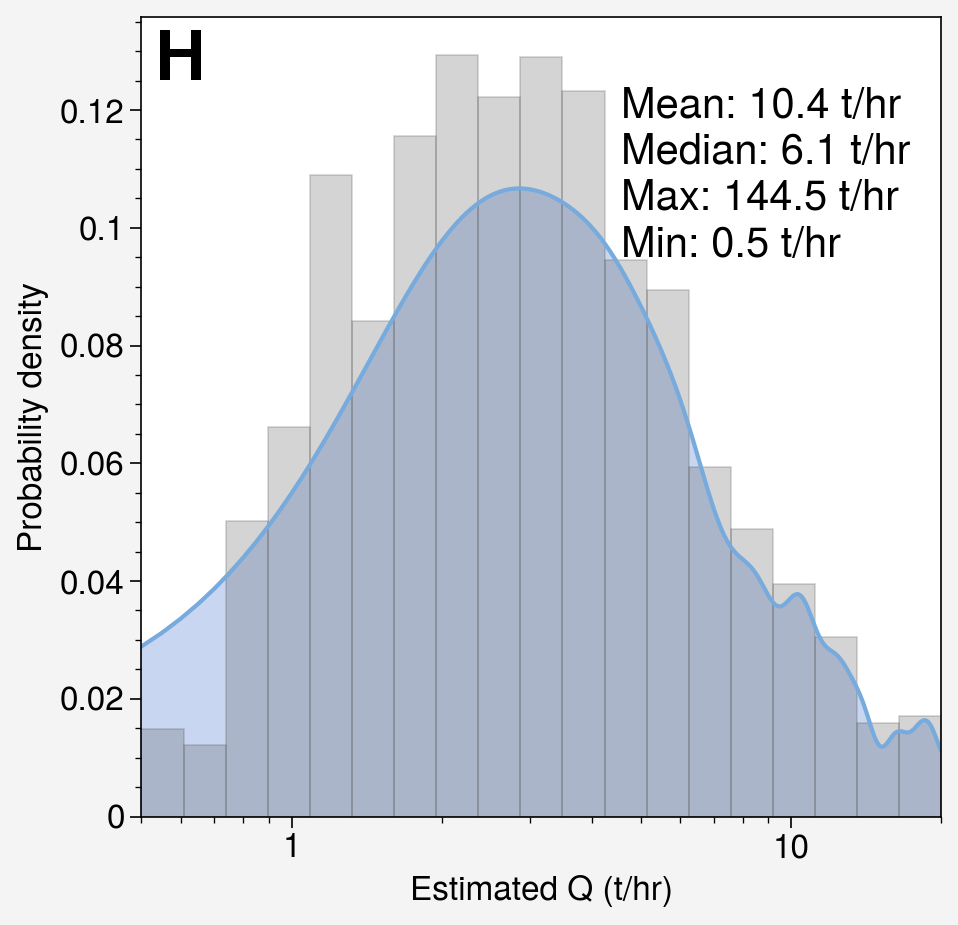

In [15]:
pplt.rc.fontsize=12
gs = pplt.GridSpec(ncols=1, nrows=1)
fig = pplt.figure(refwidth=4)
ax = fig.subplot(gs[0])
ax.number = 8

df = pd.read_csv('L5_detections_Jan8_nosmoke.csv')
# summ = 0
# numlist = []
# for i in range(1986, 2014):
#     num = len(df[df['Datetime'].str.contains('%d'%i)])
#     numlist.append(num)
#     summ += num
#     # print(num, summ)
    
qqq = df[df['Q (kg/hr)'].notna()]['Q (kg/hr)'].astype('float').values
qqq = qqq/1e3

# n, bins = np.histogram(qqq, bins=35, range=(0.5, 20), density=True)  # 
# n =  n.astype(float)
# n[np.where(n == 0)] = np.nan
# bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
# bins_mean = np.array(bins_mean)

# ax.bar(bins_mean, n, color='#77AADD')
ax.hist(qqq, bins=np.logspace(np.log10(0.5),np.log10(20), 20), density=True, facecolor='#555555', alpha=0.25, edgecolor='#555555')
ax.format(xlabel='Estimated Q (t/hr)', abc='A', abcloc='ul', abcsize=25, ylabel='Number of detections', xscale='log') # , xlim=(100, 100000)
# axs[0].format(xtickminor=True, ytickminor=False)

# axtemp = ax.twinx()

model = KernelDensity(bandwidth=0.7, kernel='gaussian')
sample = qqq[np.where(~np.isnan(qqq))]
sample = sample.reshape((-1, 1))
model.fit(sample)
values = np.array([value for value in np.arange(0, 30, 0.05)])
values = values.reshape((-1, 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

# _xx = np.arange(0.5, 30, 0.1)[:, np.newaxis]
ax.plot(values[:], probabilities, color='#77AADD')
ax.fill_between(values[:], 0, probabilities, color='#BBCCEE', alpha=0.8)
ax.format(ylabel='Probability density', xlim=(0.5, 20))

ax.text(0.6, 0.7, 'Mean: %.1f t/hr\nMedian: %.1f t/hr\nMax: %.1f t/hr\nMin: %.1f t/hr'%(np.nanmean(qqq), np.nanmedian(qqq),np.nanmax(qqq),np.nanmin(qqq),), fontsize=15, transform=ax.transAxes)

plt.grid(False)
# fig.savefig('fig1h_Aug9.pdf')